<a href="https://colab.research.google.com/github/andreamurari/percolation_project/blob/main/percolation_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import math
import numpy as np
import builtins as bt
import matplotlib.pyplot as plt
from scipy.stats import poisson
from sklearn.cluster import DBSCAN

#FUNZIONI

In [2]:
#FUNZIONE CHE GENERA COORDINATE CON UNA POIS LAMBA * T^2

def generate_poisson_coordinates(T, k):
  # Step 1: Generate N from Poisson distribution
  N = np.random.poisson(k * T**2)
  # Step 2: Check if N is zero and handle termination
  if N == 0:
    return []
  # Step 3: Generate random numbers and scale to coordinates
  else:
    coordinates_x = []
    coordinates_y = []
    for _ in range(N):
      U = np.random.random()
      V = np.random.random()
      coordinates_x.append(U * T)
      coordinates_y.append(V * T)
  #print (f"N = {N} \nCoordinates X = {coordinates_x} \nCoordinates Y = {coordinates_y}")
  return coordinates_x, coordinates_y

In [3]:
#FUNZIONE CHE CREA CLUSTERS
def clusterizza_dbscan(coordinates_x, coordinates_y, eps=1, min_samples=1):
# Combine x and y coordinates into a single NumPy array
  coordinates = np.array(list(zip(coordinates_x, coordinates_y)))

  # Create a DBSCAN instance with specified parameters
  db = DBSCAN(eps=eps, min_samples=min_samples)

  # Fit the model to the data points
  db.fit(coordinates)

  # Extract cluster labels for each point
  cluster_labels = db.labels_

  # Create a list to store clusters (indices of points in each cluster)
  clusters = []
  for i, label in enumerate(cluster_labels):
    # Skip noise points (labeled -1)
    if label == -1:
      continue
    # Find all points with the same label (belonging to the same cluster)
    cluster_indices = [j for j, l in enumerate(cluster_labels) if l == label]
    clusters.append(cluster_indices)

  return clusters

In [4]:
def remove_duplicates(clusters_with_doubles):
  for i in range(len(clusters_with_doubles)):
    for j in range(i+1, len(clusters_with_doubles)):
      if clusters_with_doubles[i] == clusters_with_doubles[j]:
        clusters_with_doubles[j] = "duplicato"
  clusters = []
  for element in clusters_with_doubles:
    if element != "duplicato":
      clusters.append(element)
  return clusters

In [5]:
#FUNZIONE PER SIZE DEL CLUSTER PIU GRANDE
def largest_cluster_size (clusters):
  max_cluster_size = 0
  for cluster in clusters:
    if len(cluster) > max_cluster_size:
      max_cluster_size = len(cluster)
  return max_cluster_size

In [6]:
#FUNZIONE CHE RESTITUISCE IL NUMERO DI CLUSTERS
def number_of_clusters(clusters):
  return len(clusters)

#SVOLGIMENTO

In [17]:
coordinates_x, coordinates_y = generate_poisson_coordinates(T, l)

In [18]:
clusters_with_duplicates = clusterizza_dbscan(coordinates_x, coordinates_y)
clusters = remove_duplicates(clusters_with_duplicates)
print(clusters)

[[0, 37, 88], [1, 342, 512], [2], [3, 143, 144, 353], [4, 304], [5], [6, 12, 96, 233, 256, 277, 507], [7, 503], [8, 80, 149, 219, 287, 335, 435], [9, 32, 520], [10], [11, 169], [13, 91, 449], [14, 132, 460], [15, 218, 336], [16, 56, 92, 168, 213, 222, 292, 302, 352, 363], [17], [18, 86, 128, 234], [19], [20, 194], [21, 42, 66, 231, 347, 483], [22, 440], [23], [24, 354, 428, 500], [25, 76, 190, 439], [26], [27], [28, 121, 126, 173, 286, 398, 427], [29, 70], [30, 193, 268], [31], [33, 200], [34, 321], [35, 275], [36], [38], [39, 397, 411, 501], [40], [41, 133], [43, 65, 179, 196, 229, 465], [44, 362], [45, 407, 422, 424, 471], [46], [47], [48], [49, 59, 141, 155, 530], [50], [51], [52], [53], [54], [55], [57, 266, 523], [58, 82, 306], [60, 120, 337, 357, 478], [61, 313], [62, 81, 412], [63, 112, 307, 368, 492], [64, 215], [67], [68], [69, 209], [71], [72], [73, 172], [74, 217], [75], [77], [78, 175, 455], [79, 162, 170, 176], [83], [84, 167, 316, 442], [85, 358], [87, 100], [89], [90, 14

In [19]:
largest_cluster_size(clusters)

10

In [20]:
number_of_clusters(clusters)

301

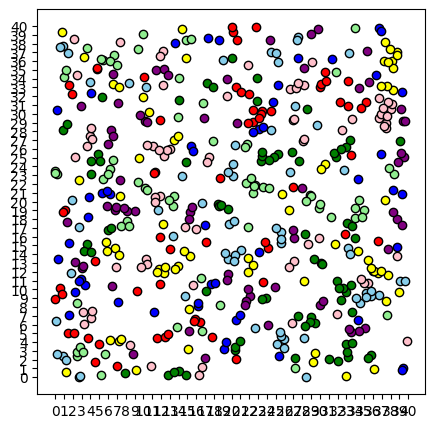

In [21]:
# Create a list to store colors for each cluster
cluster_colors = ['red', 'green', 'blue', 'yellow', 'purple', 'lightgreen', 'skyblue', 'pink']

# Create a scatter plot with points colored by cluster
plt.figure(figsize = (5, 5))
for i, cluster in enumerate(clusters):
  x_values = [coordinates_x[index] for index in cluster]
  y_values = [coordinates_y[index] for index in cluster]
  plt.scatter(x_values, y_values, c=cluster_colors[i % len(cluster_colors)], edgecolors='black')
plt.xticks(range(0, T + 1, 1))
plt.yticks(range(0, T + 1, 1))
plt.show()

In [31]:
#T = bt.input('Inserisci la dimenzione massima del dominio: ')
#l = bt.input('Inserisci il valore di  λ: ')
#M = bt.input('Inserisci il nummero iterazioni M: ')


T = 40 #MAX DOMINIO
l = 4.512/(4*math.pi) #LAMBDA
M = 10 #NUMERO ITERAZIONI

In [28]:
largest_cluster_size_df = []
number_of_clusters_df = []

for i in range(M):
  coordinates_x, coordinates_y = generate_poisson_coordinates(T, l)
  clusters_with_duplicates = clusterizza_dbscan(coordinates_x, coordinates_y)
  clusters = remove_duplicates(clusters_with_duplicates)
  clusters_with_duplicates = clusterizza_dbscan(coordinates_x, coordinates_y)
  clusters = remove_duplicates(clusters_with_duplicates)
  print ('Iteration: ', i, '\nlargest cluster size: ', largest_cluster_size(clusters), '\nnumber of clusters: ',  number_of_clusters(clusters),'\n')
  largest_cluster_size_df.append(largest_cluster_size(clusters))
  number_of_clusters_df.append(number_of_clusters(clusters))

Iteration:  0 
largest cluster size:  9 
number of clusters:  310 

Iteration:  1 
largest cluster size:  7 
number of clusters:  343 

Iteration:  2 
largest cluster size:  9 
number of clusters:  322 

Iteration:  3 
largest cluster size:  13 
number of clusters:  330 

Iteration:  4 
largest cluster size:  11 
number of clusters:  333 

Iteration:  5 
largest cluster size:  10 
number of clusters:  315 

Iteration:  6 
largest cluster size:  8 
number of clusters:  332 

Iteration:  7 
largest cluster size:  10 
number of clusters:  295 

Iteration:  8 
largest cluster size:  11 
number of clusters:  303 

Iteration:  9 
largest cluster size:  10 
number of clusters:  337 

